nに関する比較

In [1]:
# ====================================================
# Library
# ====================================================

import logging
from time import time
import pickle
from tqdm.notebook import tqdm

from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
import numpy as np
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
from scipy.stats import wishart, chi2

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/Users/mknzm/development/new_study/env_tex/01_notebook_module/bayes")

import bayes

In [3]:
# ====================================================
# Load Data
# ====================================================

rng = RandomState(0)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

In [4]:
n_samples

400

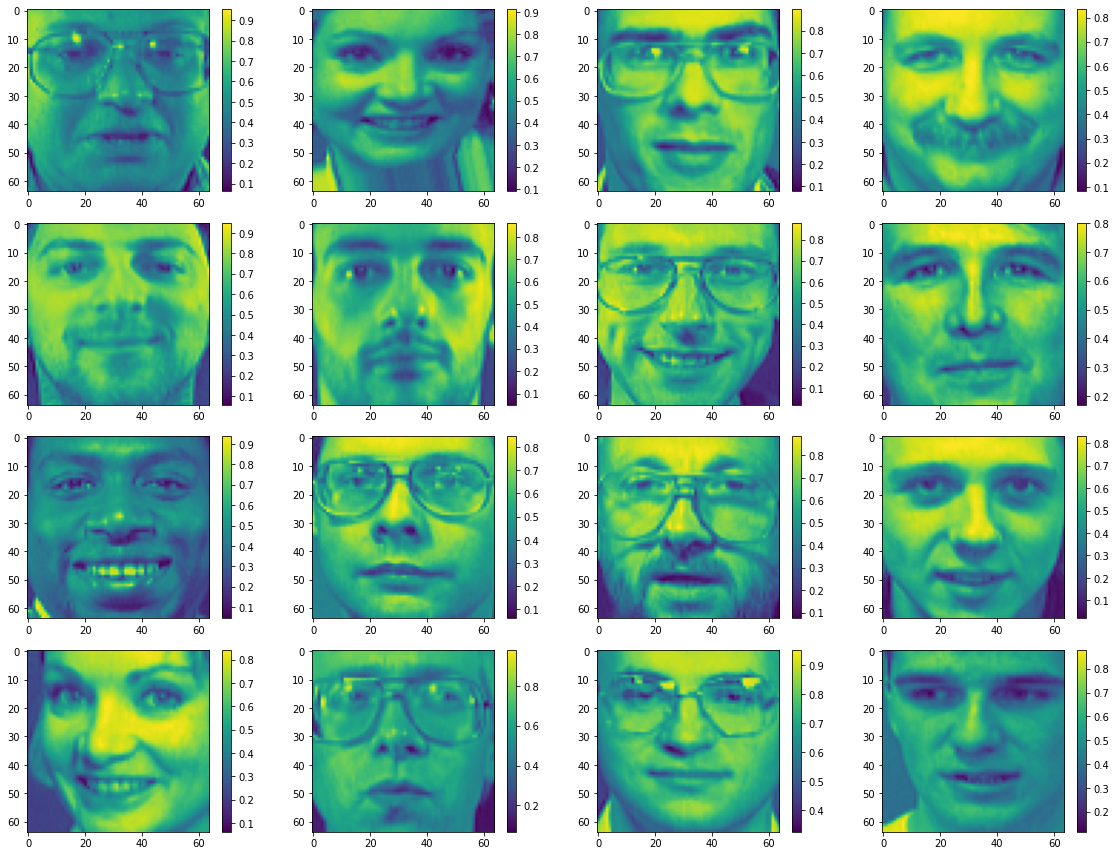

In [5]:
# ====================================================
# Show Data
# ====================================================

n_figure = 16
n_cols = 4
n_rows = 4
fig, axes = plt.subplots(figsize=(4 * n_cols, 3 * n_rows), ncols=n_cols, nrows=n_rows)
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

for i, ax in enumerate(np.ravel(axes)):
    im = ax.imshow(faces[1+i].reshape(64,64))
    fig.colorbar(im,ax=ax)

plt.tight_layout()
plt.show()

In [12]:
%%time

# ====================================================
# Prepare Model
# ====================================================

np.random.seed(seed=620)

for num_train in [260,300,350]:
    train_set = faces[:num_train]
    valid_set = faces[num_train:]

    u,s,v = np.linalg.svd(train_set)
    smat = np.zeros(train_set.shape, dtype=float)
    smat[:s.shape[0], :s.shape[0]] = np.diag(s)

    M = 256
    m = M
    first_x = u[:,:M]
    first_w = np.dot(smat, v)[:M]
    first_mu = np.mean(train_set, axis = 0)

    d = faces.shape[1]
    n = num_train

    gold_param = {
        "y": train_set,
        "valid": valid_set,
        "w": bayes.prior.Normal(np.zeros(shape = (m, d)), np.eye(m)),
        "x": bayes.prior.Normal(np.zeros(shape = (num_train, m)), np.eye(m)),
        "mu": bayes.prior.Normal(np.zeros(shape = d), np.eye(d)),
        "sigma": 0.1,
        "w_mean": first_w,
        "w_variance": np.eye(m),
        "x_mean": first_x,
        "x_variance": np.eye(m),
        "mu_mean": first_mu,
        "mu_variance": np.eye(d),
    }

    globals()[f"LDR_gold_{num_train}"] = bayes.model.LDR(**gold_param)
    print(f"NumOfTraining: {num_train}", end=": ")
    globals()[f"LDR_gold_{num_train}"].optimize(10)

NumOfTraining: 260: Epoch0: train0.0001661, valid0.07893
Epoch1: train0.0001644, valid0.07893
Epoch2: train0.0001643, valid0.07893
Epoch3: train0.0001642, valid0.07893
Epoch4: train0.0001641, valid0.07893
Epoch5: train0.000164, valid0.07893
Epoch6: train0.000164, valid0.07893
Epoch7: train0.0001639, valid0.07893
Epoch8: train0.0001638, valid0.07893
Epoch9: train0.0001638, valid0.07893
NumOfTraining: 300: Epoch0: train0.002498, valid0.0791
Epoch1: train0.002496, valid0.0791
Epoch2: train0.002496, valid0.0791
Epoch3: train0.002496, valid0.0791
Epoch4: train0.002496, valid0.0791
Epoch5: train0.002496, valid0.0791
Epoch6: train0.002496, valid0.0791
Epoch7: train0.002496, valid0.0791
Epoch8: train0.002496, valid0.0791
Epoch9: train0.002496, valid0.0791
NumOfTraining: 350: Epoch0: train0.005554, valid0.076
Epoch1: train0.005553, valid0.076
Epoch2: train0.005553, valid0.076
Epoch3: train0.005553, valid0.076
Epoch4: train0.005553, valid0.076
Epoch5: train0.005553, valid0.076
Epoch6: train0.005

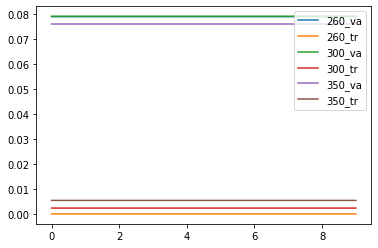

In [13]:
log_va_m = {}
log_tr_m = {}

for M in [260,300,350]:
    length = globals()[f"LDR_gold_{M}"].log_va.__len__()
    va_log = globals()[f"LDR_gold_{M}"].log_va
    tr_log = globals()[f"LDR_gold_{M}"].log_tr
    log_va_m[M] = va_log[-1]
    log_tr_m[M] = tr_log[-1]
    plt.plot(range(length), va_log, label = f"{M}_va")
    plt.plot(range(length), tr_log , label = f"{M}_tr")

plt.legend(loc='upper right')

plt.show()

In [17]:
display(min(log_va_m, key=log_va_m.get), min(log_va_m.values()))
display(min(log_tr_m, key=log_tr_m.get), min(log_tr_m.values()))

350

0.07600088620014617

260

0.00016376587103338823

In [15]:
def display_m(M):
    second_train = globals()[f"LDR_gold_{M}"].predict(faces[1:17])

    n_figure = 16
    n_cols = 4
    n_rows = 4
    fig, axes = plt.subplots(figsize=(4 * n_cols, 3 * n_rows), ncols=n_cols, nrows=n_rows)
    plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

    for i, ax in enumerate(np.ravel(axes)):
        im = ax.imshow(second_train[i].reshape(64,64))
        fig.colorbar(im,ax=ax)

    plt.tight_layout()
    plt.show()

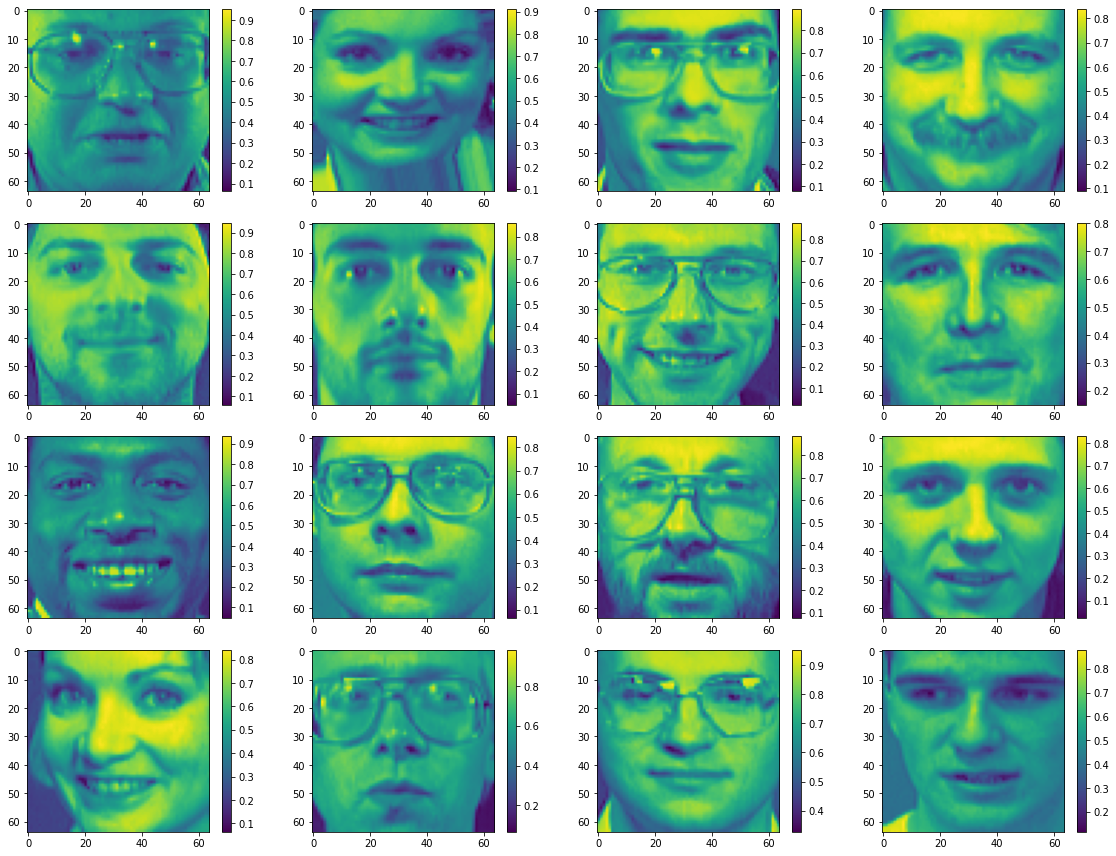

260


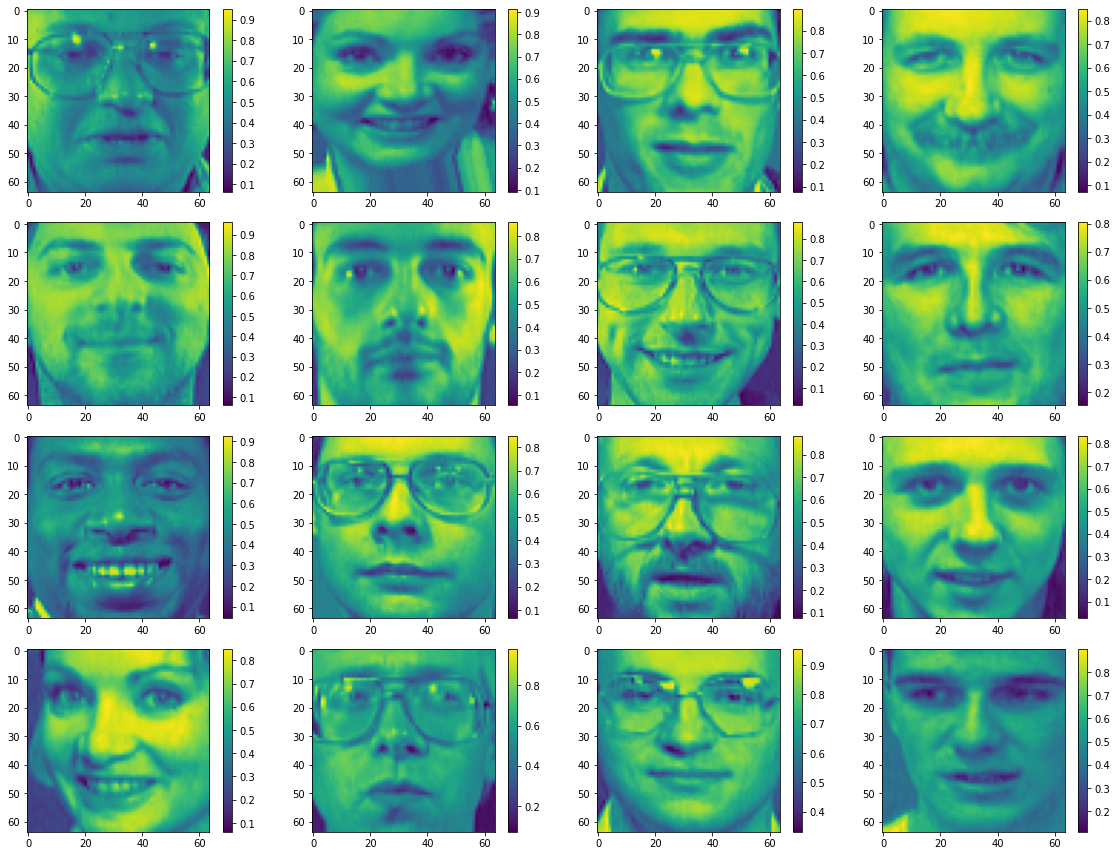

300


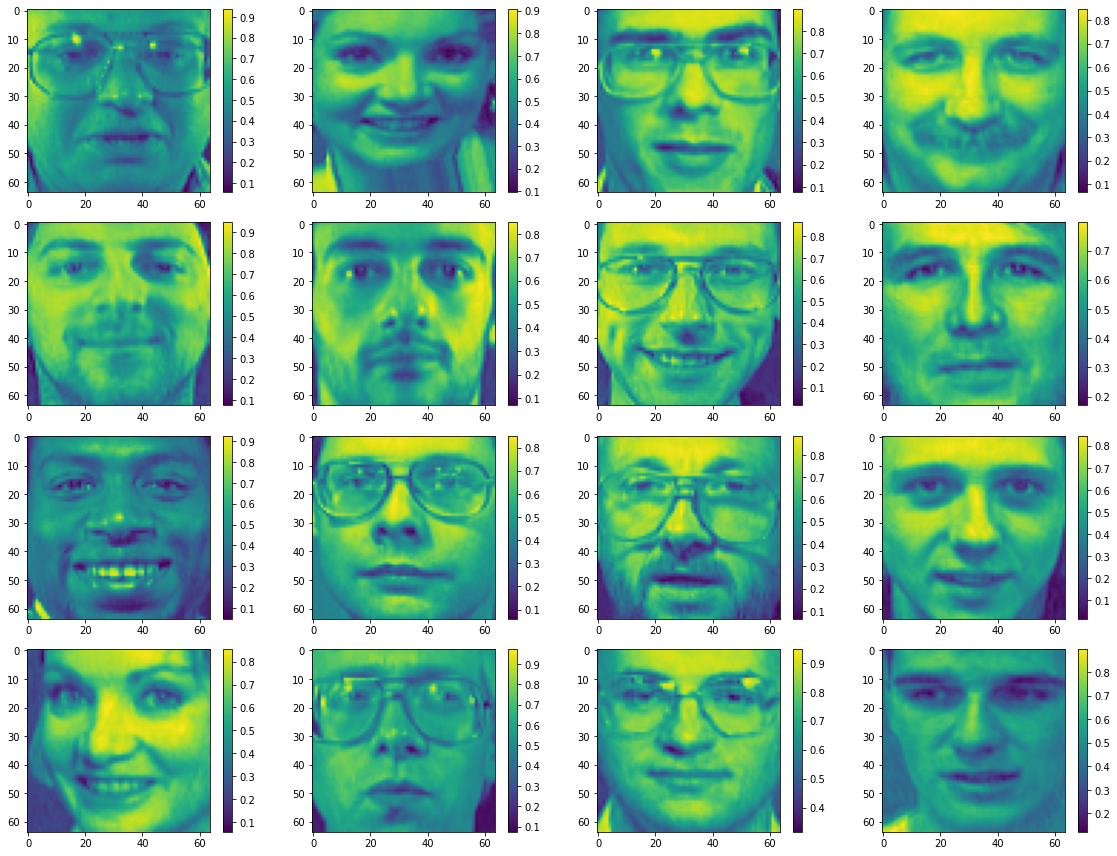

350


In [16]:
for M in [260,300,350]:
    display_m(M)
    print(M)